In [3]:
import os

from PIL import Image

# ścieżka do katalogów z obrazkami
input_paths = [
    "C:/Users/wikto/Desktop/TextureSamples/Door",
    "C:/Users/wikto/Desktop/TextureSamples/Floor",
    "C:/Users/wikto/Desktop/TextureSamples/Wall"
]
# ścieżka do nowych katalogów
output_paths = [
    "C:/Users/wikto/Desktop/TextureSamples/Door1",
    "C:/Users/wikto/Desktop/TextureSamples/Floor1",
    "C:/Users/wikto/Desktop/TextureSamples/Wall1"
]

# utworzenie nowych katalogów, jeśli nie istnieją
for output_path in output_paths:
    if not os.path.exists(output_path):
        os.makedirs(output_path)

# pętle po folderach z obrazkami i odpowiadających nowych katalogach
for input_path, output_path in zip(input_paths, output_paths):
    # pętla po plikach w folderze z obrazkami
    for filename in os.listdir(input_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # otwarcie obrazka
            img = Image.open(os.path.join(input_path, filename))

            # wycięcie fragmentów 128x128
            width, height = img.size
            for i in range(0, width, 128):
                for j in range(0, height, 128):
                    box = (i, j, i+128, j+128)
                    region = img.crop(box)

                    # zapisanie fragmentu do pliku
                    region.save(os.path.join(output_path, f"{filename}_{i}_{j}.png"))


In [4]:
import os
import numpy as np
from skimage import io, color, feature


def calculate_features(texture, distance, angles):
    # utworzenie macierzy zdarzeń
    glcm = feature.graycomatrix(texture, distances=[distance], angles=angles, levels=64, symmetric=True, normed=True)

    # wyznaczenie cech
    dissimilarity = feature.graycoprops(glcm, 'dissimilarity')[0, 0]
    correlation = feature.graycoprops(glcm, 'correlation')[0, 0]
    contrast = feature.graycoprops(glcm, 'contrast')[0, 0]
    energy = feature.graycoprops(glcm, 'energy')[0, 0]
    homogeneity = feature.graycoprops(glcm, 'homogeneity')[0, 0]
    asm = feature.graycoprops(glcm, 'ASM')[0, 0]

    return [dissimilarity, correlation, contrast, energy, homogeneity, asm]


# ścieżki do katalogów z teksturami
input_paths = ["C:/Users/wikto/Desktop/TextureSamples/Door1", "C:/Users/wikto/Desktop/TextureSamples/Wall1",
               "C:/Users/wikto/Desktop/TextureSamples/Floor1"]

# ścieżka do pliku wynikowego
output_file = "vektors.csv"

# lista cech
features_names = ["dissimilarity", "correlation", "contrast", "energy", "homogeneity", "asm"]

# lista odległości i kierunków
distances = [1, 3, 5]
angles = [0, 45, 90, 135]

with open(output_file, "w") as f:
    header = "texture_name,"
    for distance in distances:
        for angle in angles:
            header += f"{distance}_{angle}_"
            header += ",".join(features_names)
            header += ","
    header = header[:-1] + "\n"

    f.write(header)

    for i, input_path in enumerate(input_paths):

        for filename in os.listdir(input_path):

            texture = color.rgb2gray(io.imread(os.path.join(input_path, filename)))

            texture = np.uint8(texture * 63)

            features = []
            for distance in distances:
                for angle in angles:
                    angle_features = calculate_features(texture, distance, [angle, -angle])
                    features += angle_features

            f.write(  ",".join(map(str, features)) +","+f"{filename[:3]}"+ "\n")


In [5]:
import pandas as pd
df = pd.read_csv("C:/Users/wikto/Desktop/TextureSamples/vektors.csv")
df.head()

,texture_name,1_0_dissimilarity,correlation,contrast,energy,homogeneity,asm,1_45_dissimilarity,correlation.1,contrast.1,...,contrast.10,energy.10,homogeneity.10,asm.10,5_135_dissimilarity,correlation.11,contrast.11,energy.11,homogeneity.11,asm.11
0,0.899053,0.958818,2.987512,0.127238,0.689220,0.016190,2.999132,0.752938,17.824726,0.065212,...,0.050673,0.169596,0.002568,2.883194,0.630589,26.819550,0.081050,0.415012,0.006569,drz
1,1.145608,0.983400,4.712291,0.090846,0.645901,0.008253,3.151280,0.929093,20.116746,0.051828,...,0.045536,0.258722,0.002074,3.680323,0.847627,43.768229,0.057198,0.368549,0.003272,drz
2,1.721580,0.939416,10.342397,0.092083,0.565694,0.008479,3.084754,0.876880,20.898010,0.066519,...,0.047738,0.171674,0.002279,4.954141,0.608540,67.415650,0.058705,0.309331,0.003446,drz
3,2.024914,0.903313,10.929934,0.089525,0.479858,0.008015,2.428359,0.886978,12.747163,0.076252,...,0.052703,0.189828,0.002778,5.741171,0.397656,68.451410,0.054862,0.220807,0.003010,drz
4,0.423905,0.986257,0.575111,0.177549,0.802371,0.031524,2.004898,0.828382,7.208568,0.091212,...,0.076439,0.243845,0.005843,1.272929,0.912556,3.618839,0.115494,0.536351,0.013339,drz


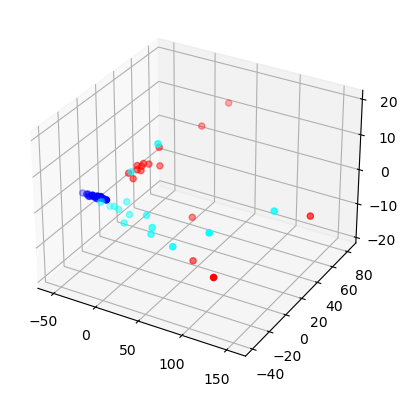

0.8125
[[1.         0.         0.        ]
 [0.11111111 0.88888889 0.        ]
 [0.33333333 0.         0.66666667]]


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


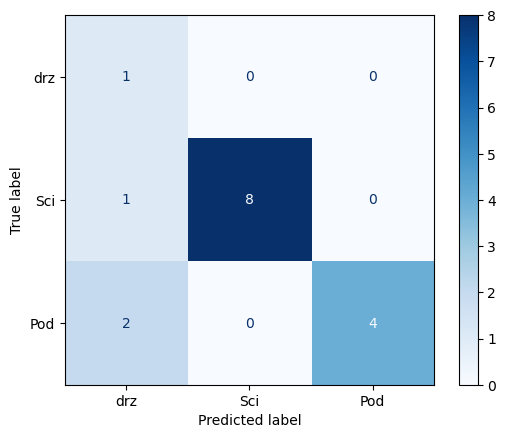

In [6]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


features = pd.read_csv('vektors.csv', sep=',')


data = np.array(features)
X = (data[:,:-1]).astype('float64')
Y = data[:,-1]

x_transform = PCA(n_components=3)

Xt = x_transform.fit_transform(X)
red = Y == 'drz'
blue = Y == 'Sci'
cyan = Y == 'Pod'

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(Xt[red,0],Xt[red,1],Xt[red,2], c='red')
ax.scatter(Xt[blue,0],Xt[blue,1],Xt[blue,2], c='blue')
ax.scatter(Xt[cyan,0],Xt[cyan,1],Xt[cyan,2], c='cyan')

plt.show()


classifier = svm.SVC(gamma='auto')

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.33)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

cm = confusion_matrix(y_test, y_pred, normalize= 'true')
print(cm)

disp = plot_confusion_matrix(classifier,x_test,y_test,display_labels=["drz","Sci","Pod"], cmap=plt.cm.Blues)
plt.show()